# Coding Assignment 1

Name: Shikhar Mohan

Roll No.: 18EC10054


This coding assignment, based on Tutorial 1 has 4 sections.
1. **Perceptron Class:** Definition of the Perceptron Class.
2. **Data Loading:** Loading the linearly separable data.
3. **Training Loop:** The main iterative training loop. Choice of hyperparameters can be observed here.
4. **Plot Generation:** Training loss and testing accuracy plots are generated here.

This `.ipynb` Jupyter Notebook is included in the .zip file deliverable along with the plot images in the Plots subfolder.

- sigmoid4.png: Sigmoid activation with 4 features (Q1)
- tanh4.png: Tanh activation with 4 features (Q1)
- sigmoid3.png: Sigmoid activation with 3 features (Q2)

In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm # Just a progress bar

## 1. Perceptron Class

In this section we design the perceptron class. The code remains similar to that from Tutorial 1, but we add two more methods: `criterion` and `label_transform`. The `criterion` method makes it the class flexible for two activation functions (sigmoid and tanh) and the `label_transform` method shifts the class labels as would be appropriate for the activation function chosen. This choice of activation function affects the classification threshold and error calculation as well, which can be observed in the `recall` method.

In [2]:
class Perceptron(object):

    def __init__(self, no_of_inputs, activation='sigmoid'):
        """
        Initialises the weights with random values
        Sets the learning rate
        """
        self.w = random.random_sample(no_of_inputs + 1)
        self.lr = 0.001
        self.bias = float(1)
        self.activ = activation

    def weight_adjustment(self, inputs, error):
        """
        Adjusts the weights in self.w
        @param inputs a list of the input values used
        @param error the difference between desired and calculated
        """
        for x in range(len(inputs)):
            # Adjust the input weights
            self.w[x] = self.w[x] + (self.lr * inputs[x] * error)

        # Adjust the bias weight (the last weight in self.w)
        self.w[-1] = self.w[-1] + (self.lr * error)

    def result(self, inputs):
        """
        @param inputs one set of data
        @returns the the sum of inputs multiplied by their weights
        """
        value = 0
        for x in range(len(inputs)):
            # Add the value of the inputs
            value += inputs[x] * self.w[x]

        # Add the value of bias
        value += self.bias * self.w[-1]

        # Put value into the SIGMOID equation
        return self.criterion(value, activ=self.activ)

    def recall(self, inputs):
        """
        Converts perceptron outputs to class predictions.
        """
        res = self.result(inputs)
        threshold = 0.5 if self.activ is 'sigmoid' else 0
        if res > threshold: return 1
        elif res <= threshold: return 0
        else: return 'FAIL'

    def criterion(self, value, activ='sigmoid'):
        if activ == 'sigmoid':
            return 1/(1 + np.exp(-value))
        else:
            return np.tanh(value)
    
    def label_transform(self, y):
        """
        Transforms the class label for error calculation appropriate for the choice
        of activation. 0,1 labels are shifted to -1,1 for tanh, but remain the same
        for sigmoid.
        """
        if self.activ == 'sigmoid': return y
        else: return 2*y - 1

## 2. Data Loading

Below we load the linearly separable testing and training data from the files data1_test.txt and data1_train.txt (provided in Tutorial 1) into the `data_test` and `data_train` variables respectively. Each data point has 4 features and a binary class label.

In [3]:
data_train = [[[0.6455696202531644,
   0.7954545454545454,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.5949367088607594,
   0.7272727272727273,
   0.18840579710144928,
   0.08000000000000002],
  0],
 [[0.5822784810126581,
   0.7045454545454546,
   0.2173913043478261,
   0.08000000000000002],
  0],
 [[0.6329113924050632,
   0.8181818181818181,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.6835443037974683,
   0.8863636363636364,
   0.2463768115942029,
   0.16000000000000003],
  0],
 [[0.6329113924050632,
   0.7727272727272727,
   0.2173913043478261,
   0.08000000000000002],
  0],
 [[0.5569620253164557,
   0.6590909090909091,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.620253164556962,
   0.7045454545454546,
   0.2173913043478261,
   0.04000000000000001],
  0],
 [[0.6075949367088607,
   0.7727272727272727,
   0.23188405797101452,
   0.08000000000000002],
  0],
 [[0.6075949367088607,
   0.6818181818181818,
   0.20289855072463767,
   0.04000000000000001],
  0],
 [[0.5443037974683543,
   0.6818181818181818,
   0.15942028985507248,
   0.04000000000000001],
  0],
 [[0.7341772151898733,
   0.9090909090909091,
   0.17391304347826086,
   0.08000000000000002],
  0],
 
 [[0.6835443037974683,
   0.8863636363636364,
   0.18840579710144928,
   0.16000000000000003],
  0],
 [[0.6455696202531644, 0.7954545454545454, 0.20289855072463767, 0.12], 0],
 [[0.7215189873417721, 0.8636363636363635, 0.2463768115942029, 0.12], 0],
 
 [[0.6835443037974683,
   0.7727272727272727,
   0.2463768115942029,
   0.08000000000000002],
  0],
 [[0.6455696202531644,
   0.8409090909090909,
   0.2173913043478261,
   0.16000000000000003],
  0],
 
 [[0.6455696202531644, 0.7499999999999999, 0.2463768115942029, 0.2], 0],
 [[0.6075949367088607,
   0.7727272727272727,
   0.2753623188405797,
   0.08000000000000002],
  0],
 [[0.6329113924050632,
   0.6818181818181818,
   0.23188405797101452,
   0.08000000000000002],
  0],
 [[0.6329113924050632,
   0.7727272727272727,
   0.23188405797101452,
   0.16000000000000003],
  0],
 [[0.6582278481012658,
   0.7727272727272727,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.5949367088607594,
   0.7272727272727273,
   0.23188405797101452,
   0.08000000000000002],
  0],
 [[0.6835443037974683,
   0.7727272727272727,
   0.2173913043478261,
   0.16000000000000003],
  0],
 [[0.6582278481012658,
   0.9318181818181817,
   0.2173913043478261,
   0.04000000000000001],
  0],
 [[0.6962025316455696,
   0.9545454545454546,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.620253164556962,
   0.7045454545454546,
   0.2173913043478261,
   0.08000000000000002],
  0],
 [[0.6329113924050632,
   0.7272727272727273,
   0.17391304347826086,
   0.08000000000000002],
  0],
 [[0.6962025316455696,
   0.7954545454545454,
   0.18840579710144928,
   0.08000000000000002],
  0],
 [[0.620253164556962,
   0.8181818181818181,
   0.20289855072463767,
   0.04000000000000001],
  0],
 [[0.5569620253164557,
   0.6818181818181818,
   0.18840579710144928,
   0.08000000000000002],
  0],
 [[0.6455696202531644,
   0.7727272727272727,
   0.2173913043478261,
   0.08000000000000002],
  0],
 [[0.6329113924050632, 0.7954545454545454, 0.18840579710144928, 0.12], 0],
 [[0.5696202531645569, 0.5227272727272727, 0.18840579710144928, 0.12], 0],
 [[0.6329113924050632, 0.7954545454545454, 0.23188405797101452, 0.24], 0],
 [[0.6455696202531644,
   0.8636363636363635,
   0.2753623188405797,
   0.16000000000000003],
  0],
 [[0.6075949367088607, 0.6818181818181818, 0.20289855072463767, 0.12], 0],
 [[0.5822784810126581,
   0.7272727272727273,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.670886075949367,
   0.8409090909090909,
   0.2173913043478261,
   0.08000000000000002],
  0],
 [[0.6329113924050632,
   0.7499999999999999,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.8860759493670884,
   0.7272727272727273,
   0.6811594202898551,
   0.5599999999999999],
  1],
 [[0.8101265822784809,
   0.7272727272727273,
   0.6521739130434783,
   0.6000000000000001],
  1],
 [[0.6962025316455696, 0.5227272727272727, 0.5797101449275363, 0.52], 1],
 [[0.8227848101265821,
   0.6363636363636364,
   0.6666666666666666,
   0.6000000000000001],
  1],
 [[0.7215189873417721, 0.6363636363636364, 0.6521739130434783, 0.52], 1],
 [[0.7974683544303796,
   0.7499999999999999,
   0.6811594202898551,
   0.6400000000000001],
  1],
 [[0.620253164556962, 0.5454545454545454, 0.4782608695652174, 0.4], 1],
 [[0.6582278481012658,
   0.6136363636363636,
   0.5652173913043478,
   0.5599999999999999],
  1],
 [[0.6329113924050632, 0.45454545454545453, 0.5072463768115942, 0.4], 1],
 [[0.7468354430379747,
   0.6818181818181818,
   0.6086956521739131,
   0.6000000000000001],
  1],
 [[0.7594936708860758, 0.5, 0.5797101449275363, 0.4], 1],
 [[0.772151898734177,
   0.6590909090909091,
   0.6811594202898551,
   0.5599999999999999],
  1],
 [[0.7088607594936708, 0.6590909090909091, 0.5217391304347826, 0.52], 1],
 [[0.8481012658227847,
   0.7045454545454546,
   0.6376811594202899,
   0.5599999999999999],
  1],
 [[0.7341772151898733, 0.6136363636363636, 0.5942028985507246, 0.4], 1],
 [[0.7088607594936708,
   0.5681818181818181,
   0.5652173913043478,
   0.44000000000000006],
  1],
 [[0.7468354430379747,
   0.7272727272727273,
   0.6956521739130435,
   0.7200000000000001],
  1],
 [[0.7974683544303796,
   0.5681818181818181,
   0.7101449275362319,
   0.6000000000000001],
  1],
 [[0.772151898734177, 0.6363636363636364, 0.6811594202898551, 0.48], 1],
 [[0.8101265822784809, 0.6590909090909091, 0.6231884057971014, 0.52], 1],
 [[0.8354430379746833,
   0.6818181818181818,
   0.6376811594202899,
   0.5599999999999999],
  1],
 [[0.8607594936708859,
   0.6363636363636364,
   0.6956521739130435,
   0.5599999999999999],
  1],
 [[0.8481012658227847, 0.6818181818181818, 0.7246376811594203, 0.68], 1],
 [[0.7215189873417721, 0.5909090909090909, 0.5072463768115942, 0.4], 1],
 [[0.6962025316455696,
   0.5454545454545454,
   0.5507246376811594,
   0.44000000000000006],
  1],
 [[0.6962025316455696, 0.5454545454545454, 0.5362318840579711, 0.4], 1],
 [[0.7341772151898733, 0.6136363636363636, 0.5652173913043478, 0.48], 1],
 [[0.7594936708860758,
   0.6136363636363636,
   0.7391304347826086,
   0.6400000000000001],
  1],
 [[0.6835443037974683,
   0.6818181818181818,
   0.6521739130434783,
   0.6000000000000001],
  1],

 [[0.8481012658227847,
   0.7045454545454546,
   0.6811594202898551,
   0.6000000000000001],
  1],
 [[0.7974683544303796, 0.5227272727272727, 0.6376811594202899, 0.52], 1],
 [[0.7088607594936708, 0.6818181818181818, 0.5942028985507246, 0.52], 1],
 [[0.6962025316455696, 0.5681818181818181, 0.5797101449275363, 0.52], 1],
 [[0.772151898734177,
   0.6818181818181818,
   0.6666666666666666,
   0.5599999999999999],
  1],
 [[0.7341772151898733, 0.5909090909090909, 0.5797101449275363, 0.48], 1],
 [[0.6329113924050632, 0.5227272727272727, 0.4782608695652174, 0.4], 1],
 [[0.7088607594936708, 0.6136363636363636, 0.6086956521739131, 0.52], 1],
 [[0.7215189873417721, 0.6818181818181818, 0.6086956521739131, 0.48], 1],
 [[0.7215189873417721, 0.6590909090909091, 0.6086956521739131, 0.52], 1],
 [[0.7215189873417721, 0.6363636363636364, 0.5942028985507246, 0.52], 1]]

In [4]:
data_test = [[[0.620253164556962,
   0.6818181818181818,
   0.20289855072463767,
   0.08000000000000002],
  0],
 [[0.5822784810126581, 0.7727272727272727, 0.20289855072463767, 0.12], 0],
[[0.6835443037974683,
   0.8409090909090909,
   0.2173913043478261,
   0.08000000000000002],
  0],
[[0.7215189873417721, 1.0, 0.2173913043478261, 0.16000000000000003], 0],
[[0.6455696202531644, 0.8636363636363635, 0.2173913043478261, 0.12], 0],
[[0.5822784810126581,
   0.8181818181818181,
   0.14492753623188406,
   0.08000000000000002],
  0],
[[0.6582278481012658,
   0.7954545454545454,
   0.2173913043478261,
   0.08000000000000002],
  0],
[[0.6075949367088607,
   0.7045454545454546,
   0.23188405797101452,
   0.08000000000000002],
  0],
[[0.6455696202531644,
   0.8636363636363635,
   0.23188405797101452,
   0.08000000000000002],
  0],
[[0.5569620253164557,
   0.7272727272727273,
   0.18840579710144928,
   0.08000000000000002],
  0],
[[0.8734177215189872,
   0.7045454545454546,
   0.7101449275362319,
   0.6000000000000001],
  1],
 [[0.8354430379746833, 0.6590909090909091, 0.6666666666666666, 0.52], 1],
[[0.7088607594936708,
   0.6818181818181818,
   0.6521739130434783,
   0.6000000000000001],
  1],
[[0.772151898734177, 0.6363636363636364, 0.5797101449275363, 0.52], 1],
[[0.7594936708860758,
   0.6590909090909091,
   0.6521739130434783,
   0.6000000000000001],
  1],
 [[0.7594936708860758,
   0.7727272727272727,
   0.6521739130434783,
   0.6400000000000001],
  1],
[[0.6962025316455696, 0.5909090909090909, 0.6376811594202899, 0.48], 1],
[[0.7848101265822783, 0.6590909090909091, 0.6231884057971014, 0.52], 1],
 [[0.6455696202531644,
   0.5681818181818181,
   0.4347826086956522,
   0.44000000000000006],
  1],
 [[0.7848101265822783, 0.5, 0.6521739130434783, 0.6000000000000001], 1]]

## 3. Training Loop

In the first line, the `activation` variable can be set to either `'sigmoid'` or `'tanh'` for the choice of activation functions for Q1. For Q2, set:
```
activation = 'sigmoid'
features = 3
```

The hyperparameters we chose are:
```
epochs = 500
```
We observe that the training loss decreases further for higher epochs, but we reach 100% testing accuracy at this epoch, so we stop here for early stopping, and achieve better generalisation.

In [10]:
activation = 'tanh' # Change to tanh for second activation in Q1, keep it 'sigmoid' for the first
features = 4 # Change to 3 with activation = 'sigmoid' for Q2
p = Perceptron(features, activation=activation)

# Number of full iterations
epochs = 500

# Lists for plotting training loss and testing accuracy in the next section
plot_loss = []
plot_acc = []

pbar_epochs = tqdm(range(epochs))   # Add progress bar to epoch iterator
for _ in pbar_epochs:

  # Epoch cumulative error
  error = 0

  # For each set in the training_data
  for value in data_train:

      output = p.result(value[0][:features])
      iter_error = p.label_transform(value[1]) - output
      error += iter_error

      p.weight_adjustment(value[0][:features], iter_error)

  # Calculate the MSE - epoch error / number of sets
  mse = float(error/len(data_train))
  plot_loss.append(abs(mse))

  # Calculate testing accuracy

  correct, total = 0, len(data_test)
  for value in data_test:
      output = p.recall(value[0][:features])   # Using the nearest integer for classification
      correct += (output == value[1])

  accuracy = (100*correct)/total
  plot_acc.append(accuracy)
  pbar_epochs.set_description("Train accuracy: %.4f%% | Test loss: %.6f" % (accuracy, abs(mse))) # Show statistics with epochs in progress bar
  # print("At %d epochs the training error is %.10f and testing accuracy is %2.4f%%" % (_, abs(mse), accuracy))

  0%|          | 0/500 [00:00<?, ?it/s]

## 4. Plot Generation

For each run of the training loop, the training loss and testing accuracy data over `epochs` number of epochs gets stored in `plot_loss` and `plot_acc` respectively. The below code snippet uses the `matplotlib` library to generate the relevant plots.

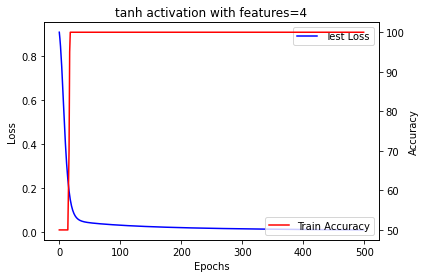

In [11]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(plot_loss, color='blue')
ax_right.plot(plot_acc, color='red')
ax_left.set_xlabel('Epochs')
ax_left.set_ylabel('Loss')
ax_right.set_ylabel('Accuracy')
ax_left.legend(['Test Loss'], loc='best')
ax_right.legend(['Train Accuracy'], loc='best')
plt.title('%s activation with features=%d' % (activation, features))

plt.show()